In [1]:
from airstreams import Flow

In [2]:
basedir = Path('/home/nicolas/ETHZ/projects/crCLIM/blocking.2km/data/flows_COSMO7_offline/1500m/1999/11/')

In [18]:
startf = '/home/nicolas/ETHZ/projects/airstreams/data/startf.txt'

In [3]:
def basemap():
    crs = ccrs.Stereographic(central_longitude=180 - 170,
                             central_latitude=90 - 43,
                             true_scale_latitude=90 - 43)
    ax = plt.axes(projection=crs)
    ax.set_extent([0, 20, 40, 52])
    # ax.coastlines('50m')
    land_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries',
                                            '50m', edgecolor='gray',
                                            facecolor='none', linewidth=0.5)
    ax.add_feature(land_50m)
    return ax

def read_start_points(filename):
    flow = Flow()
    flow.load_netcdf(filename, unit='seconds', date=0, usedatetime=False)
    return flow['number'] # view(flow.dtype[1]).reshape(-1, 2)

In [19]:
lonlat = np.genfromtxt(startf, names=['lon', 'lat'])

In [4]:
flowfiles = basedir.files(pattern='*.nc')
flowfiles.sort()

In [8]:
numbers = np.concatenate([read_start_points(flowfile) for flowfile in flowfiles]).squeeze()

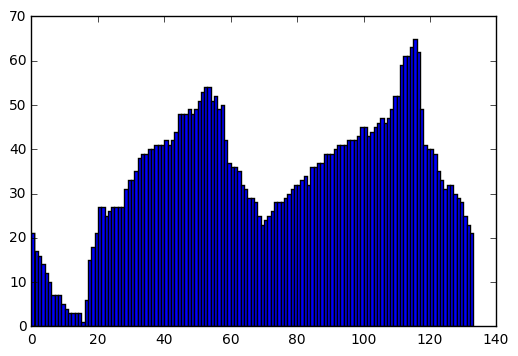

In [17]:
values, _, _ = plt.hist(numbers, bins=np.arange(0, 134))

/sharing/virtualenvs/py3env/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


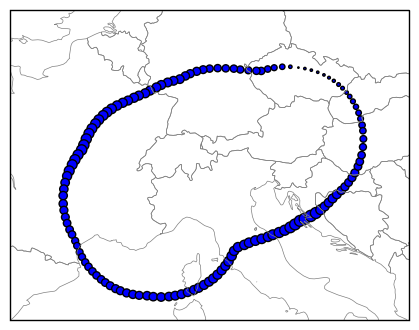

In [25]:
ax = basemap()
ax.scatter(lonlat['lon'], lonlat['lat'], values, transform=ccrs.Geodetic())